Scraping berita online dari situs Detik.com dari berbagai macam kategori

Kategori:
```
https://{}.detik.com/indeks/
1. finance: ekonomi, bisnis, dan investasi.
2. inet: teknologi, informasi, dan gadget.
3. sport: seputar olahraga.
4. oto: otomotif luar dan dalam negeri.
5. travel: inspirasi jalan-jalan ke mana saja.
6. food: kabar kuliner, resep, dan rekomendasi tempat makan.
7. health: artikel kesehatan, diet, seks, dan konsultasi.
-----------------------------------------------------------
https://www.detik.com/{}/indeks/
8. edu: dunia pendidikan.
9. properti: jual beli, sewa rumah, dan apartemen tanah
```





Data yang nantinya akan diambil adalah judul, tanggal publish, isi/konten berita, dan kategori yang diambil dari 9 kategori di atas.

In [1]:
from bs4 import BeautifulSoup as bs # tool scraping
from tqdm import tqdm # biar keren

import requests
import pandas as pd

In [2]:
kategori1 = ['finance', 'inet', 'sport', 'oto', 'travel', 'food', 'health']
kategori2 = ['edu', 'properti']

# dibedakan karena susunan URL nya berbeda


halaman = 20 # jumlah halaman, satu halaman memuat 20 berita
berita = []

In [3]:
# -- Kategori 1 --

for i in kategori1:
    print(f"Kategori - {i}:")
    for ii in range(halaman):
        url = f'https://{i}.detik.com/indeks/{ii+1}'

        html = requests.get(url).text
        soup = bs(html, 'html.parser')

        container = soup.find_all("div", class_="container")

        for containers in tqdm(container, desc=f"\tHalaman - {ii+1}"):
            articles = containers.find_all("article", class_="list-content__item")

            for article in articles:
                judul = article.find("h3", class_="media__title").text.strip()

                # Karena judul berita yang diawali dengan "Video" itu pasti berupa video, bukan data text, jadi di sini dihapus (tidak dimasukkan), atau dilewati

                if judul.startswith("Video"):
                    continue

                link = article.find("a")["href"]

                #print(judul)
                #print(link)

                html_konten = requests.get(link).text
                soup_konten = bs(html_konten, 'html.parser')

                container_konten = soup_konten.find_all("div", class_="container")

                for containers_konten in container_konten:
                    articles_konten = containers_konten.find_all("article", class_="detail")

                    for article_konten in articles_konten:
                        #tanggal
                        tanggal = article_konten.find("div", class_="detail__date")
                        if tanggal:
                            tgl = tanggal.text.strip()
                            date = " ".join(tgl.split(", ")[1].split(" ")[:3])

                        konten = article_konten.find_all("p", class_ = None)

                        berita.append({
                            'judul': judul,
                            'tanggal': date,
                            'konten': '\n'.join([iii.text.strip() for iii in konten]),
                            'kategori': i
                        })

Kategori - finance:


	Halaman - 20: 100%|██████████| 5/5 [00:51<00:00, 10.26s/it]


Kategori - inet:


	Halaman - 20: 100%|██████████| 5/5 [00:39<00:00,  7.84s/it]


Kategori - sport:


	Halaman - 20: 100%|██████████| 5/5 [00:48<00:00,  9.78s/it]


Kategori - oto:


	Halaman - 20: 100%|██████████| 5/5 [00:47<00:00,  9.51s/it]


Kategori - travel:


	Halaman - 20: 100%|██████████| 5/5 [00:45<00:00,  9.13s/it]


Kategori - food:


	Halaman - 20: 100%|██████████| 5/5 [00:48<00:00,  9.61s/it]


Kategori - health:


	Halaman - 20: 100%|██████████| 5/5 [00:50<00:00, 10.07s/it]


In [4]:
# -- Kategori 2 --

# Dibuat beda sel, karena lama bgt anjirr

for i in kategori2:
    print(f'Kategori - {i}:')
    for ii in range(halaman):
        url = f'https://www.detik.com/{i}/indeks/{ii+1}'

        html = requests.get(url).text
        soup = bs(html, 'html.parser')

        container = soup.find_all("div", class_="container")

        for containers in tqdm(container, desc=f"\tHalaman - {ii+1}"):
            articles = containers.find_all("article", class_="list-content__item")

            for article in articles:
                judul = article.find("h3", class_="media__title").text.strip()

                if judul.startswith("Video"):
                    continue

                link = article.find("a")["href"]

                #print(judul)
                #print(link)

                html_konten = requests.get(link).text
                soup_konten = bs(html_konten, 'html.parser')

                container_konten = soup_konten.find_all("div", class_="container")

                for containers_konten in container_konten:
                    articles_konten = containers_konten.find_all("article", class_="detail")

                    for article_konten in articles_konten:
                        #tanggal
                        tanggal = article_konten.find("div", class_="detail__date")
                        if tanggal:
                            tgl = tanggal.text.strip()
                            date = " ".join(tgl.split(", ")[1].split(" ")[:3])

                        konten = article_konten.find_all("p", class_ = None)

                        berita.append({
                            'judul': judul,
                            'tanggal': date,
                            'konten': '\n'.join([iii.text.strip() for iii in konten]),
                            'kategori': i
                        })

Kategori - edu:


	Halaman - 20: 100%|██████████| 5/5 [00:37<00:00,  7.45s/it]


Kategori - properti:


	Halaman - 20: 100%|██████████| 5/5 [00:42<00:00,  8.42s/it]


In [5]:
df = pd.DataFrame(berita)
df

,judul,tanggal,konten,kategori
0,Cara Daftar Shopee Food Driver dan Food Mercha...,08 Des 2024,Shopee Food adalah salah satu layanan pesan an...,finance
1,"Istilah Pinjol Dianggap Negatif, Kini Diganti ...",08 Des 2024,Asosiasi Fintech Pendanaan Bersama Indonesia (...,finance
2,Kopi Kenangan Punya Siapa? Ini Sosok dan Filos...,08 Des 2024,Kopi Kenangan adalah salah satu merek kopi lok...,finance
3,Mudik Gratis Nataru Dibuka! Cek Cara Daftar da...,08 Des 2024,Kementerian Perhubungan (Kemenhub) melalui Dir...,finance
4,Memahami Tax Holiday: Tujuan dan Manfaatnya ba...,08 Des 2024,Tax holiday adalah kebijakan fiskal pemerintah...,finance
...,...,...,...,...
3439,Sebelum Jual Rumah Perbaiki Masalah Ini Biar H...,19 Nov 2024,Saat ingin memutuskan menjual rumah yang sudah...,properti
3440,5 Trik Mencairkan Bunga Es Freezer yang Cepat ...,19 Nov 2024,"Saat kamu ingin membersihkan kulkas, bagian fr...",properti
3441,Menteri Ara Mau Relokasi Penghuni Kolong Jemba...,19 Nov 2024,Menteri Perumahan dan Kawasan (PKP) Maruarar S...,properti
3442,6 Pertimbangan saat Bingung Pilih Walpaper Ata...,19 Nov 2024,Memasang wallpaper atau mengecat dinding bisa ...,properti


In [11]:
df.isna().sum()

,0
judul,0
tanggal,0
konten,0
kategori,0


In [12]:
df['kategori'].value_counts()

,count
kategori,
properti,395
finance,393
oto,393
food,392
travel,388
sport,384
edu,375
health,368
inet,356


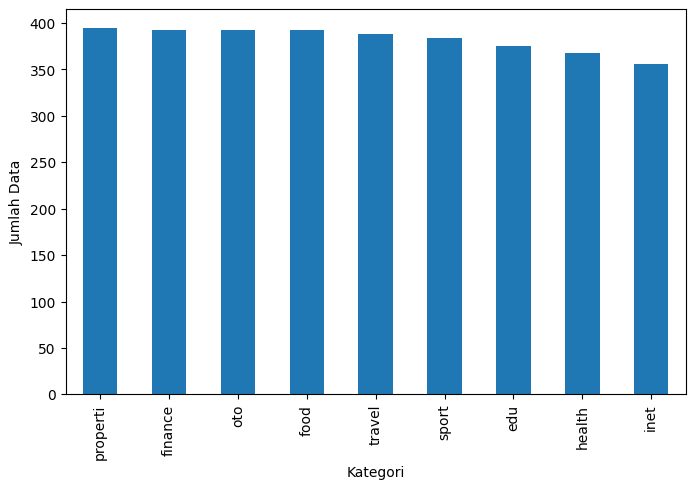

In [14]:
import matplotlib.pyplot as plt

# plot jumlah kategori

class_count = df['kategori'].value_counts()

plt.figure(figsize=(8, 5))
class_count.plot(kind='bar')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.show()

In [15]:
df.to_csv('berita.csv', index=False) # simpan ke csv

In [9]:
# gw malas nunggu, lama juga, jadi pas selesai biar tau makanya dikasih sound

from IPython.display import Audio

#sound = "https://github.com/Upo-Smith/a/raw/refs/heads/main/1699100334315.mp3" #miku
sound = "https://github.com/Upo-Smith/a/raw/refs/heads/main/Last%20Rizzday%20Night%20-%20Reisa.mp3" #reisa

response = requests.get(sound)

with open("reisa.mp3", "wb") as f:
    f.write(response.content)

In [10]:
Audio("reisa.mp3", autoplay=True)